In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

- Pandas is a newer package built on top of NumPy
- Designed to make working with structured data (like tables or spreadsheets) easy and intuitive

# Intro

## The Pandas Series Object

- Series is an analog of a one-dimensional array with flexible indices
- The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values

In [1]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

NameError: name 'pd' is not defined

In [ ]:
# data.index
# data['b']
data.values

array([0.25, 0.5 , 0.75, 1.  ])

### Series as specialized dictionary

- Pandas Series a bit like a specialization of a Python dictionary
- Series is a structure which maps typed keys to a set of typed values
- Can be made even more clear by constructing a Series object directly from a Python dictionary


In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [ ]:
# Slicing
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

## Pandas dataframe object

- DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names
- DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data
- A DataFrame is a collection of Series objects, and a single-column DataFrame can be constructed from a single Series

<br>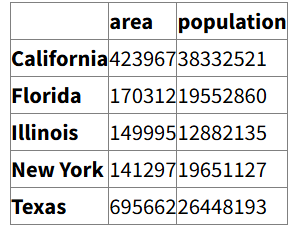

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
# index attribute that gives access to the index labels
states.index

# columns attribute, which is an Index object holding the column labels
# states.columns

# values attribute
# states.values

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [ ]:
# DataFrame as specialized dictionary
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
# Constructing DataFrame objects
# From a single Series object
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [ ]:
# From dictionary of Series objects
data = pd.DataFrame({'population': population,
                     'area': area})
data

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
# From a two-dimensional NumPy array
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.598580,0.055367
b,0.919184,0.490907
c,0.660173,0.145029


In [ ]:
# From a NumPy structured array
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Pandas Index object

- Immutable array & Ordered set
- Facilitate operations such as joins across datasets
- Used by Python's built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way

In [ ]:
# The Pandas Index Object (immutable array)
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [ ]:
# Index as ordered set (intersection, union, difference, symmetric difference)
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

indA & indB  # intersection
indA | indB  # union
indA ^ indB  # symmetric difference

Index([3, 0, 0, 0, 2], dtype='int64')

# Read Data

## Read CSV

In [ ]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [ ]:
display(pop.head(), areas.head(), abbrevs.head())

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
combine_data = pd.merge(pop, abbrevs, how='outer',left_on='state/region', right_on='abbreviation')
combine_data.drop('abbreviation', axis=1, inplace=True) # inplace=True means that the changes are saved to the df right away
combine_data.head()

,state/region,ages,year,population,state
0,AK,total,1990,553290.0,Alaska
1,AK,under18,1990,177502.0,Alaska
2,AK,total,1992,588736.0,Alaska
3,AK,under18,1991,182180.0,Alaska
4,AK,under18,1992,184878.0,Alaska


In [ ]:
# check if there are any null values in the data
combine_data.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [ ]:
# Some of the population data is null, let's see which ones
combine_data[combine_data['population'].isnull()].head()

,state/region,ages,year,population,state
1872,PR,under18,1990,NaN,NaN
1873,PR,total,1990,NaN,NaN
1874,PR,total,1991,NaN,NaN
1875,PR,under18,1991,NaN,NaN
1876,PR,total,1993,NaN,NaN


In [ ]:
# state entries are also null, which means that there was no corresponding entry in the abbrevs key
combine_data.loc[combine_data['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [ ]:
# Fixing the null values
combine_data.loc[combine_data['state/region'] == 'PR', 'state'] = 'Puerto Rico'
combine_data.loc[combine_data['state/region'] == 'USA', 'state'] = 'United States'
# then no more null values at state column
combine_data.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [ ]:
final = pd.merge(combine_data, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [ ]:
# 1 again check if there are any null values in the data
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [ ]:
# 2 Some of the area data is null, let's see which ones by the state
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [ ]:
# Fill null values with 0
# final['area (sq. mi)'].fillna(0, inplace=True)

# Or we can drop the rows with null values
final.dropna(inplace=True)

final.head() # Now we have a clean data

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [ ]:
# Now we can query the data to answer the question
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
43,AK,total,2010,713868.0,Alaska,656425.0
51,AL,total,2010,4785570.0,Alabama,52423.0
141,AR,total,2010,2922280.0,Arkansas,53182.0
149,AZ,total,2010,6408790.0,Arizona,114006.0
197,CA,total,2010,37333601.0,California,163707.0


In [ ]:
# Set the state as the index
# Case sensitive
# 1st run the inplace=True, the state column will be removed and set to the index
# 2nd run the state column is already removed, so it will throw an error
# make sure to run the code only once, then comment it out

# data2010.set_index('state', inplace=True)

# Compute the population density
density = data2010['population'] / data2010['area (sq. mi)']

# Sort the data by density
density.sort_values(ascending=False, inplace=True)

density.head(10)

341     8898.897059
1914    1058.665149
1493    1009.253268
1962     681.339159
293      645.600649
954      621.815538
965      466.445797
427      460.445752
1637     356.094135
475      286.597129
dtype: float64

In [ ]:
# also we can check the last 10 states with the lowest density by using tail()
density.tail(10)

2213    32.677188
1589    24.448796
1434    23.654153
629     18.794338
1578    16.982737
2058    10.583512
1349     9.537565
1253     6.736171
2501     5.768079
43       1.087509
dtype: float64

# Data Indexing and Selection

## Data selection in series

- A Series object acts in many ways like a one-dimensional NumPy array

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

# Series as dictionary
# data['b']

# using python expressions
# 'a' in data

# data.keys()

# Series objects can be modified with a dictionary-like syntax
data['e'] = 1.25

## Series as one-dimensional array

In [ ]:
# slicing by explicit index
data['a':'c']

# slicing by implicit integer index
# data[0:2]

# masking
# data[(data > 0.3) & (data < 0.8)]

# fancy indexing
# data[['a', 'e']]

a    0.25
b    0.50
c    0.75
dtype: float64

## Indexers: loc, iloc and ix (deprecated)

- Slicing and indexing conventions can be a source of confusion:
  - 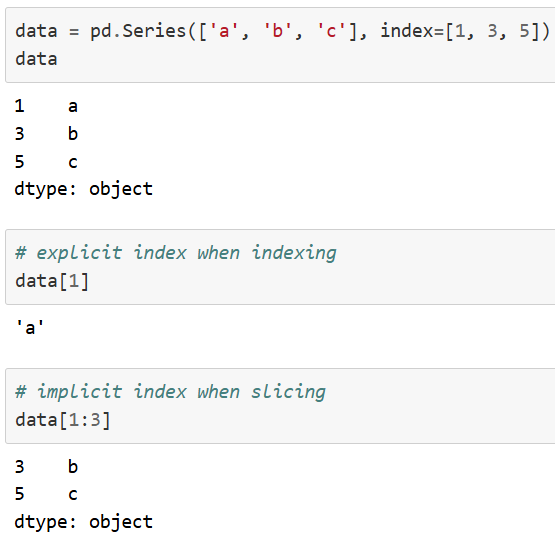
- Not functional methods, but attributes that expose a particular slicing interface to the data in the Series

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])

# loc attribute allows indexing and slicing that always references the explicit index
# data.loc[3: 5]

# iloc attribute allows indexing and slicing that always references the implicit Python-style index
# data.iloc[1]


## Data selection in DataFrame

- Acts in many ways like a two-dimensional or structured array
- In other ways like a dictionary of Series structures

### DataFrame as a dictionary

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
# Accessing columns
# data['area']

# equivalent to
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### Additional indexing conventions

In [ ]:
# data['Florida':'Illinois']

# data[1:3]

data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# Operating on Data in Pandas

## Ufuncs: Index Preservation

- Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and DataFrame objects

In [ ]:
# Series
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))

# DataFrame
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])

# element-wise exponentiation of values in the Series to the power of e (Euler's number)
print(f'With series values: \n{ser},\nthere are exponentiation of each \n{np.exp(ser)}')  


With series values: 
0    6
1    3
2    7
3    4
dtype: int32,
there are exponentiation of each 
0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64


## Ufuncs: Index Alignment

For binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operation

### Index Alignment in Series

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [ ]:
# The resulting array contains the union of indices of the two input arrays, which could be determined using standard Python set arithmetic on these indices
# Which one or the other does not have an entry is marked with NaN, or "Not a Number", which is how Pandas marks missing data
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

# The result is still has NaN values
# A + B

# The fill value can be modified using the add method
A.add(B, fill_value=0) # equivalent to A + B, but with fill_value=0, which fills in missing entries with the value 0

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

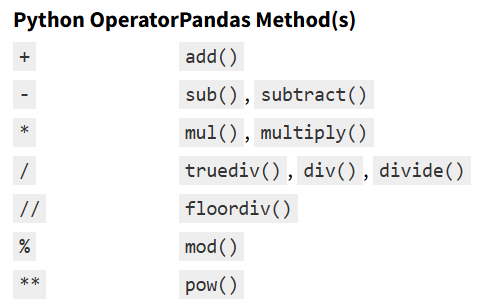

In [ ]:
rng = np.random.RandomState(42)  # Using seed 42 for reproducibility

A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))

B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))

# A + B  # The indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted

fill = A.stack().mean()
A.add(B, fill_value=fill)  # fill with 0 if there is no value

,A,B,C
0,10.00,26.00,18.25
1,16.00,19.00,18.25
2,16.25,19.25,15.25


### Ufuncs: Operations Between DataFrame and Series

- Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy array

In [ ]:
A = rng.randint(10, size=(3, 4))
A

array([[7, 7, 2, 5],
       [4, 1, 7, 5],
       [1, 4, 0, 9]], dtype=int32)

In [ ]:
A - A[0]  # subtracts the first row from all rows

array([[ 0,  0,  0,  0],
       [-3, -6,  5,  0],
       [-6, -3, -2,  4]], dtype=int32)

In [ ]:

df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]  # subtracts the first

# df.subtract(df['R'], axis=0)  # subtracts the values in column 'R' from all columns

halfrow = df.iloc[0, ::2]

print(f'Dataframe: \n{df}')
print(f'First row: \n{df.iloc[0]}')
print(f'Half row: \n{halfrow}')

Dataframe: 
   Q  R  S  T
0  7  7  2  5
1  4  1  7  5
2  1  4  0  9
First row: 
Q    7
R    7
S    2
T    5
Name: 0, dtype: int32
Half row: 
Q    7
S    2
Name: 0, dtype: int32


In [ ]:
df - halfrow  # subtracts the half row from all rows

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-3.0,NaN,5.0,NaN
2,-6.0,NaN,-2.0,NaN


# Handling Missing Data

- Real-world data is rarely clean and homogeneous

## Trade-Offs in Missing Data Conventions

- Masking approach, the mask might be an entirely separate **Boolean array**, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value
- Sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing **integer value with -9999 or some rare bit pattern**, or it could be a more global convention, such as indicating **a missing floating-point value with NaN (Not a Number)**, a special value which is part of the IEEE floating-point specification
- None of these approaches is without trade-offs:
  - Use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation
  - A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic

## Mising Data in Pandas

### Pythonic mising data

- 1st sentinel value used by Pandas is **None**
- **None** can not be used in any arbitrary Numpy/Pandas array
- Only in arrays with data type "Object"
- Performing aggregations like **sum()**, **min()** across an array with **None** type

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

### Missing numerical data

- NaN is different (a special floating-point value recognized by all systems that use the standard IEEE floating-point representation)
- NaN virus-it infects any other object it touches (1 + np.nan = nan, vals2.min() = nan, ...)
- NaN is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [ ]:
# TO ignore these missing values
print(f'return the value for valse2.nansum() = {np.nansum(vals2)}')

return the value for valse2.nansum() = 8.0


### NaN and None in Pandas

- If we set a value in an integer array to np.nan, it will automatically be upcast to a floating-point type
- Casting the integer array to floating point, Pandas automatically converts the None to a NaN value
- In Pandas, string data is always stored with an object dtype

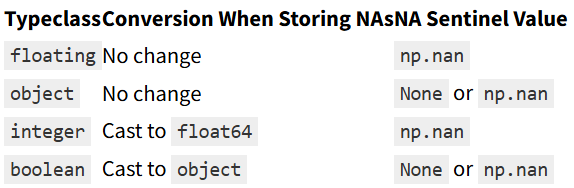

## Operating on Null Values

- Pandas treats None and NaN as essentially interchangeable for indicating missing or null values
-  To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures

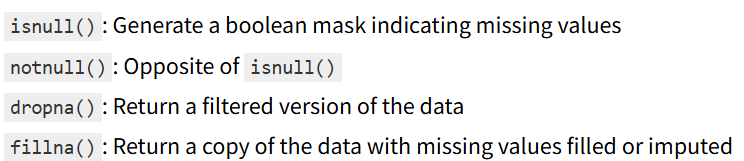

### Detecting null values

In [ ]:
# isnull() functions
data = pd.Series([1, np.nan, 'hello', None])
print(f'Check for null values: \n{data.isnull()}')

Check for null values: 
0    False
1     True
2    False
3     True
dtype: bool


In [ ]:
# notnull() functions
print(f'Check for not null values: \n{data.notnull()}')

Check for not null values: 
0     True
1    False
2     True
3    False
dtype: bool


### Droping null values

In [ ]:
# dropna() function
print(f'Drop null values: \n{data.dropna()}')

Drop null values: 
0        1
2    hello
dtype: object


In [ ]:
# For dataframes
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])

print(f'Dataframe: \n{df}')

print(f'Drop null values: \n{df.dropna()}') # By default, dropna() will drop all rows in which any null value is present

print(f'Drop null values: \n{df.dropna(axis=1)}') # drop columns with null values

Dataframe: 
     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6
Drop null values: 
     0    1  2
1  2.0  3.0  5
Drop null values: 
   2
0  2
1  5
2  6


In [ ]:
# add new column 3 with all null values
df[3] = np.nan
print(f'Dataframe: \n{df}')

# using thresh parameter to drop rows or columns with a certain number of non-null values
print(f'Drop null values: \n{df.dropna(axis=0, thresh=3)}') # drop rows with at least 2 non-null values

Dataframe: 
     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN
Drop null values: 
     0    1  2   3
1  2.0  3.0  5 NaN


### Filling null values

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print(f'Data: \n{data}')

# fillna() function
print(f'Fill null values: \n{data.fillna(0)}')

# forward-fill
print(f'Forward-fill: \n{data.fillna(method="ffill")}')

# back-fill
print(f'Back-fill: \n{data.fillna(method="bfill")}')

Data: 
a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64
Fill null values: 
a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64
Forward-fill: 
a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64
Back-fill: 
a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64


C:\Users\ttcha\AppData\Local\Temp\ipykernel_24416\816451242.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(f'Forward-fill: \n{data.fillna(method="ffill")}')
C:\Users\ttcha\AppData\Local\Temp\ipykernel_24416\816451242.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(f'Back-fill: \n{data.fillna(method="bfill")}')


# Hierarchical Indexing (Multi-Indexing)

- Also known as multi-level indexing
- Allows you to have multiple index levels on sing axis
- Enables you to work with higher-dimensional data in a 1D (Series) or 2D (DataFrame) format

## Multipy Indexed Series

### The best way

In [ ]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

# MultiIndex object from a simple list of arrays giving the index values within each level
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [ ]:
pop = pd.Series(populations, index=index)
# reindex the data to create a MultiIndex Series from the data
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

### Multiindex as extra dimension

In [ ]:
# unstack() method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [ ]:
# stack() method provides the opposite operation
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# MultiIndex for columns in a DataFrame
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [ ]:
# fraction of people under 18 by year
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

**The most straighforward way to contruct a multiply indexed Series or DataFrame**

In [ ]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.954804  0.687962
  2  0.638091  0.137741
b 1  0.433956  0.537669
  2  0.240619  0.933849

In [ ]:
# if you pass a dictionary with appropriate tuples as keys, Pandas will automatically recognize this and use a MultiIndex by default

data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

## Explicit MultiIndex constructors

In [ ]:
# From array
a = pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

# From tuples
b = pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

# From product, it provides all possible pairs of the two sequences
c = pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

# From Levels
d = pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

print(f'From arrays: \n{a}')
print(f'From tuples: \n{b}')
print(f'From product: \n{c}')
print(f'From levels: \n{d}')

From arrays: 
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
From tuples: 
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
From product: 
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
From levels: 
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )


## MultiIndex level names

In [ ]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## MultiIndex for columns

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  38.2  43.0  35.2  34.0  39.4
     2      51.0  37.3  21.0  36.4  26.0  37.7
2014 1      50.0  37.8  37.0  37.1  49.0  38.7
     2      46.0  37.3  47.0  36.6  41.0  36.6

In [ ]:
health_data['Guido'] # Accessing the data

type          HR  Temp
year visit            
2013 1      43.0  35.2
     2      21.0  36.4
2014 1      37.0  37.1
     2      47.0  36.6

## Indexing and slicing a MultiIndex

### Multiply indexed Series

In [ ]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Access single element
print(f'Access single element: \n{pop["California", 2000]}')

# Partial indexing
print(f'\nPartial indexing: \n{pop["California"]}')

# Partial slicing 
print(f'\nPartial slicing: \n{pop["California":"New York"]}')

# Passing an empty slice in the first index
print(f'\nEmpty slice: \n{pop[:, 2000]}')

# Boolean mask
print(f'\nBoolean mask: \n{pop[pop > 22000000]}')

# Fancy indexing
print(f'\nFancy indexing: \n{pop[["California", "Texas"]]}')

Access single element: 
33871648

Partial indexing: 
year
2000    33871648
2010    37253956
dtype: int64

Partial slicing: 
state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

Empty slice: 
state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

Boolean mask: 
state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Fancy indexing: 
state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64


### Multiply Indexed DataFrames

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  38.2  43.0  35.2  34.0  39.4
     2      51.0  37.3  21.0  36.4  26.0  37.7
2014 1      50.0  37.8  37.0  37.1  49.0  38.7
     2      46.0  37.3  47.0  36.6  41.0  36.6

In [ ]:
print(f'Accessing the data: \n{health_data["Guido", "HR"]}')

# Slicing the data
print(f'\nSlicing the data: \n{health_data.iloc[:2, :2]}') # Getting the first two rows and columns

# Slicing the data
print(f'\nSlicing the data: \n{health_data.loc[:, ("Bob", "HR")]}') # Getting the Bob's HR data

# Slicing the data
# idx is a slice object that allows for a more intuitive way to slice the data using the loc accessor
idx = pd.IndexSlice
# idx[:, 1] is a slice that allows us to take all values in the first index
# idx[:, "HR"] is a slice that allows us to take all values in the second index
print(f'\nSlicing the data: \n{health_data.loc[idx[:, 1], idx[:, "HR"]]}') # Getting the HR data for the first visit

Accessing the data: 
year  visit
2013  1        43.0
      2        21.0
2014  1        37.0
      2        47.0
Name: (Guido, HR), dtype: float64

Slicing the data: 
subject      Bob      
type          HR  Temp
year visit            
2013 1      29.0  38.2
     2      51.0  37.3

Slicing the data: 
year  visit
2013  1        29.0
      2        51.0
2014  1        50.0
      2        46.0
Name: (Bob, HR), dtype: float64

Slicing the data: 
subject      Bob Guido   Sue
type          HR    HR    HR
year visit                  
2013 1      29.0  43.0  34.0
2014 1      50.0  37.0  49.0


## Rearranging Multi-Indices

### Sorted and unsorted indices

- Many of the MultiIndex slicing operations will fail if the index is not sorted

In [ ]:
# from_product() method helps to generate every possible combination of the given arrays
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
print(f'From product: \n{index}')
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
print(f'\nData: \n{data}')

From product: 
MultiIndex([('a', 1),
            ('a', 2),
            ('c', 1),
            ('c', 2),
            ('b', 1),
            ('b', 2)],
           )

Data: 
char  int
a     1      0.699150
      2      0.839353
c     1      0.657249
      2      0.020846
b     1      0.757402
      2      0.945044
dtype: float64


In [ ]:
# Error due to the fact that the data is not sorted
# print(f'Slicing the unsorted data: \n{data["a":"b"]}')

# Sorting the data
data = data.sort_index()
print(f'\nSorted data: \n{data}')

# Now the slicing works
print(f'\nSlicing the sorted data: \n{data['a':'b']}')


Sorted data: 
char  int
a     1      0.699150
      2      0.839353
b     1      0.757402
      2      0.945044
c     1      0.657249
      2      0.020846
dtype: float64

Slicing the sorted data: 
char  int
a     1      0.699150
      2      0.839353
b     1      0.757402
      2      0.945044
dtype: float64


### Stacking and UnStacking indices

- To reshape DataFrames and Series that have multiple objects
- Allow to move levels of the index between rows and columns
- Effectively transposing sections of the data
- Stacking (.stack())
  - Transforms a DataFrame with a multi-level column index into a Series with a multi-level row index
  - It "pivots" the innermost level of the column index to become the innermost level of the row index
- Unstacking (.unstack())
  - Transforms a Series with a multi-level row index into a DataFrame with a multi-level column index
  - It "pivots" the innermost level of the row index to become the innermost level of the column index

In [ ]:
# pop.unstack() method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame
# level=0 indicates the first level of the index
print(f'Unstacking the data: \n{pop.unstack(level=0)}')

# level=1 indicates the second level of the index
print(f'\nUnstacking the data: \n{pop.unstack(level=1)}')

Unstacking the data: 
state  California  New York     Texas
year                                 
2000     33871648  18976457  20851820
2010     37253956  19378102  25145561

Unstacking the data: 
year            2000      2010
state                         
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561


### Index setting and resetting

In [ ]:
# Print the data
print(f'Original data: \n{pop}')

# stack() method provides the opposite operation
pop_flat = pop.reset_index(name='population')
pop_flat

Original data: 
state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [ ]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data Aggregations on Multi-Indices

Data aggregation methods (mean(), sum(), and max()), these can be passed a level parameter that controls which subset of the data the aggregate is computed on

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  38.2  43.0  35.2  34.0  39.4
     2      51.0  37.3  21.0  36.4  26.0  37.7
2014 1      50.0  37.8  37.0  37.1  49.0  38.7
     2      46.0  37.3  47.0  36.6  41.0  36.6

# Concat

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### Concatenation

- Similar with concatenation of **Numpy**
- One important difference between np.concatenate and pd.concat is that Pandas concatenation preserves indices 

In [ ]:
# Concat of Numpy
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
print(f'Concatenation of Numpy: \n{np.concatenate([x, y, z])}')

# Concat of Pandas
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
print(f'\nConcatenation of Pandas: \n{pd.concat([ser1, ser2])}')

Concatenation of Numpy: 
[1 2 3 4 5 6 7 8 9]

Concatenation of Pandas: 
1    A
2    B
3    C
4    D
5    E
6    F
dtype: object


In [ ]:
# Pandas preserves indices, even if the result will have duplicate indices
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
df1.index = df2.index # make duplicate indices!

print(f'Concatenation of DataFrames: \n{pd.concat([df1, df2])}')

Concatenation of DataFrames: 
    A   B
3  A1  B1
4  A2  B2
3  A3  B3
4  A4  B4


In [ ]:
# Catching the duplicate indices as errors
try:
    pd.concat([df1, df2], verify_integrity=True) # verify_integrity=True will catch the error
except ValueError as e:
    print("ValueError:", e)

# Ignoring the index
print(f'\nConcatenation of DataFrames: \n{pd.concat([df1, df2], ignore_index=True)}') # ignore_index=True will create a new integer index

# Adding MultiIndex keys
print(f'\nConcatenation of DataFrames: \n{pd.concat([df1, df2], keys=['x', 'y'])}') # keys option will add a hierarchical index

ValueError: Indexes have overlapping values: Index([3, 4], dtype='int64')

Concatenation of DataFrames: 
    A   B
0  A1  B1
1  A2  B2
2  A3  B3
3  A4  B4

Concatenation of DataFrames: 
      A   B
x 3  A1  B1
  4  A2  B2
y 3  A3  B3
  4  A4  B4


### Concatenation with joins

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

print(f'Concatenation of DataFrames: \n{pd.concat([df5, df6])}') # By default, entries for which no data is available are filled with NaN

# join outer
print(f'\nJoin outer: \n{pd.concat([df5, df6], join="outer")}') # join="outer" takes the union of the columns

# join inner
print(f'\nJoin inner: \n{pd.concat([df5, df6], join="inner")}') # join="inner" takes the intersection of the columns

Concatenation of DataFrames: 
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

Join outer: 
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

Join inner: 
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


# Merge and Join

## Categories of Joins

- The pd.merge() function implements a number of types of joins
  - one-to-one
  - many-to-one
  - many-to-many

### One-to-one Joins

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [ ]:
# One-to-one joins
df3 = pd.merge(df1, df2) # merge() function recognizes that each DataFrame has an "employee" column, and automatically joins using this column as a key
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-one Joins

In [ ]:
# Many-to-one joins
# Many-to-one joins are joins in which one of the two key columns contains duplicate entries
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

display(df3, df4, pd.merge(df3, df4)) # merge() function automatically aligns the data using the common column names

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


### Many-to-many Joins

In [ ]:
# Many-to-many joins
# Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined
# If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})

display(df1, df5, pd.merge(df1, df5)) # merge() function automatically aligns the data using the common column names

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


## Specification of the Merge Key

### The 'on' Keyword

In [ ]:
# Specification of the Merge Key
# The on keyword specifies the name of the key column
# If the two input DataFrames have different column names, you can specify them separately using the left_on and right_on keywords
display(df1, df2, pd.merge(df1, df2, on='employee'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
# left_on and right_on keywords
# If you wish to merge by different names, you can use the left_on and right_on keywords to specify the two column names
# The result has a redundant column that we can drop if desired—for example, by using the drop() method of DataFrames
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

display(df1, df3, pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)) # drop the redundant column

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The left_index and right_index Keywords

**Sometimes rather than merge on a column, you can merge on index instead**

In [ ]:
# The left_index and right_index keywords
# Sometimes, rather than merging on a column, you would instead like to merge on an index
# For this, you can use the left_index and right_index keywords
df1a = df1.set_index('employee') # set_index() method can be used to set the index
df2a = df2.set_index('employee')

display(df1a, df2a, pd.merge(df1a, df2a, left_index=True, right_index=True))

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [ ]:
# join and merge are similar operations but have some differences
# join() method performs a merge that defaults to joining on indices
display(df1a, df2a, df1a.join(df2a)) # join() method performs a merge that defaults to joining on indices

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


## Specifying Set Arithmetic for Joins

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

display(df6, df7, pd.merge(df6, df7)) # merge() function automatically aligns the data using the common column names

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Mary,bread,wine


In [ ]:
# outer and inner joins using merge() function
display(df6, df7, pd.merge(df6, df7, how='outer')) # how='outer' takes the union of the input columns

display(pd.merge(df6, df7, how='inner')) # how='inner' takes the intersection of the input columns

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Joseph,NaN,beer
1,Mary,bread,wine
2,Paul,beans,NaN
3,Peter,fish,NaN


,name,food,drink
0,Mary,bread,wine


In [ ]:
# left and right joins using merge() function
display(df6, df7, pd.merge(df6, df7, how='left')) # how='left' takes all the values from the left

display(pd.merge(df6, df7, how='right')) # how='right' takes all the values from the right

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## Overlapping Column Names: The keywords (suffixes)

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

# merge() function automatically suffixes the column names
display(df8, df9, pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])) # suffixes=["_L", "_R"] keyword to specify the suffixes to be used

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


# Aggregation and Grouping

## Simple Aggregation in Pandas

**The following table summarizes some other built-in Pandas aggregations** <br>
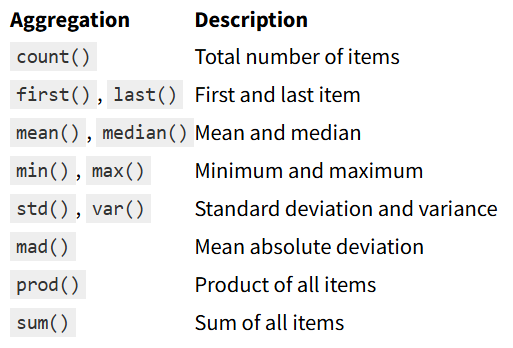

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))

display(ser, ser.sum(), ser.mean())

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

np.float64(2.811925491708157)

np.float64(0.5623850983416314)

In [ ]:
# for data frames
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
display(df, df.mean(), df.mean(axis='columns')) # axis='columns' or axis=1 computes the mean down each column

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


A    0.477888
B    0.443420
dtype: float64

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [ ]:
planets = sns.load_dataset('planets')

# using dropna() to drop rows with missing data
# using describe() to get a quick statistical summary of the data
# using both dropna() and describe() to get a clean data summary without missing values
display(planets.head(), planets.shape, planets.dropna().describe())

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


(1035, 6)

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called **groupby** operation
- The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
- The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The combine step merges the results of these operations into an output array.
<br><br>
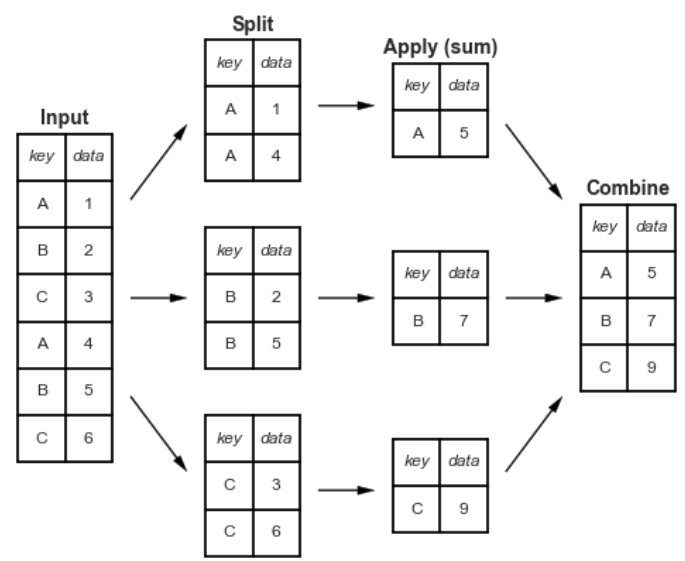

In [6]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'data': range(6)}, columns=['key', 'data']) # create a DataFrame with a column of letters and a column of numbers

# The most basic split-apply-combine operation can be computed with the groupby()
display(df, df.groupby('key').sum())

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


,data
key,
A,3
B,5
C,7


### GroupBy object

#### Column indexing

- a very flexible abstraction
- the most important operations made available by a GroupBy are 
  - aggregate
  - filter
  - transform
  - apply

In [ ]:
# define the planet data using seaborn
planets = sns.load_dataset('planets')

# group the planets data by method
# then apply the median aggregation to each group
display(planets.head(), planets.shape, planets.groupby('method')['orbital_period'].median())

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


(1035, 6)

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

#### Iterations over groups

**The GroupBy object supports direct iteration over the groups, returning each group as a Series or DataFrame**

In [16]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


#### Dispatch methods

In [21]:
# using describe() to get a statistical summary of the data
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [ ]:
# aggregate, filter, transform, and apply
rng = np.random.RandomState(0)
df = pd.DataFrame(
    {
        "key": ["A", "B", "C", "A", "B", "C"],
        "data1": range(6),
        "data2": rng.randint(0, 10, 6),
    },
    columns=["key", "data1", "data2"],
)

display(df)
print("---------------Aggregate--------------")
# aggregate operation
# aggregate() method allows for even more flexibility
# it can take a string, a function, or a list thereof, and compute all the aggregates at once
display(
    df.groupby("key").aggregate(["min", np.median, max]),
    df.groupby("key").aggregate({"data1": "min", "data2": "max"}),
)

print("---------------Filter--------------")


# filtering operation
def filter_func(x):
    return x["data2"].std() > 4

# filter() method returns a subset of the data
# filter_func is a user-defined function that takes a DataFrame and returns a boolean
display(df.groupby("key").std(), df.groupby("key").filter(filter_func))

print("---------------Transformation--------------")

# transformation operation
# transform() method returns a DataFrame with the same shape as the input
# but with the group-wise transformed values instead of the group values themselves
# transformation can return some transformed version of the full data to recombine
display(df.groupby("key").transform(lambda x: x - x.mean()))


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


---------------Aggregate--------------


C:\Users\ttcha\AppData\Local\Temp\ipykernel_15628\3108535814.py:15: FutureWarning: The provided callable <function median at 0x000002387F9116C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby("key").aggregate(["min", np.median, max]),
C:\Users\ttcha\AppData\Local\Temp\ipykernel_15628\3108535814.py:15: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby("key").aggregate(["min", np.median, max]),


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


---------------Filter--------------


,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


---------------Transformation--------------


,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0
